<a href="https://colab.research.google.com/github/tkeldenich/THE_Best_Data_Science_Project_to_start_wit/blob/main/THE_Best_Data_Science_Project_to_start_with.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE Best Data Science Project to start with – Simple Tutorial**

*   [English Article](https://www.inside-machinelearning.com/en/best-data-science-project-to-start/)
*   [French Article](https://www.inside-machinelearning.com/le-meilleur-projet-data-science-pour-bien-debuter-tutoriel-simple/)



Discover THE tutorial you need to start your Data Science journey : process explanation and details of the code and techniques.

**Data Science is the use of modern techniques and tools to analyze and extract information from data.**

In this project we will use Python libraries: Pandas, Numpy & Scikit-learn.

**You will see here :**

*   First steps in Data Science
*   Data analysis techniques
*   Machine Learning algorithms

Let’s go !

## **Load our data**

### **First steps**

For this project we will take a dataset well known in Data Science: the Boston Housing Dataset. This dataset lists data from Boston’s housing.

**Our goal is to predict the price of a house from its data.**

We recommend you to use a Python Notebook to follow this project. You will be able to easily copy/paste the following lines of code. At [Inside Machine Learning](https://www.inside-machinelearning.com/en/), we recommend you to use [Google Colab](https://colab.research.google.com), a simple (no installation needed) and free option.

The first step is to import our data into our code environment.

For that we will use a basic library : Pandas. And download our dataset directly from its URL, in our environment :

In [ ]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

We now have access to our Pandas Dataframe which contains all our data.

However, to use the Scikit-learn library, we need to transform this Dataframe into a Numpy Array. Indeed the Pandas library is not compatible with Scikit-learn.

So we will transform this Dataframe into a Numpy Array. And I suggest you to create directly two Arrays :

X features (the housing information)
Y target (the price to predict)

In [ ]:
import numpy as np

X_full = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

(506, 13)
(506,)


### **Our Dataset**

Then we can display some information about our dataset. In particular the dimension of our Arrays :



In [ ]:
print(X_full.shape)
print(Y.shape)

Our dataset contains 506 rows, that is 506 houses. Each of these houses contains 13 columns :

*   CRIM – per capita crime rate by town
*   ZN – proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS – proportion of non-retail business acres per town.
*   CHAS – Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX – nitric oxides concentration (parts per 10 million)
*   RM – average number of rooms per dwelling
*   AGE – proportion of owner-occupied units built prior to 1940
*   DIS – weighted distances to five Boston employment centres
*   RAD – index of accessibility to radial highways
*   TAX – full-value property-tax rate per $10,000
*   PTRATIO – pupil-teacher ratio by town
*   B – 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT – % lower status of the population

And our Target MEDV – Median value of owner-occupied homes in $1000’s.

Now that we have information about our dataset, we can start the analysis of our data.

## **Analyze your data**

### **Correlation score**

In this part, we are going to do Data Analysis thanks to the Scikit-learn library.

**I remind you that our objective is to predict our target Y from our features X.**

So we will first determine for which column X we can best predict our Y

For that we use the `f_regression()` which computes the correlation score between each of our features and our target.

Then with `SelectKBest` we choose the K most correlated columns. In our case k=1 so we take the most correlated feature to our target.

**Simply put, this operation allows us to extract the feature that best predicts our target.**

Be careful here, the most correlated feature of the dataset does not imply that we can predict our target with it. It only indicates that it is the best feature to use to predict our target among the features of the dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print(X.shape)

In our case the feature with the highest correlation score (also called k-highest score) is the last column of our dataset. This information is given by the `selector.get_support()` function.

**Let’s call it feature-K.**

### **Feature-K**

We extract this column to do a more detailed analysis of our dataset.

Is the relationship between our feature-K and the target linear ?

If so, the prediction of the target will be easy.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

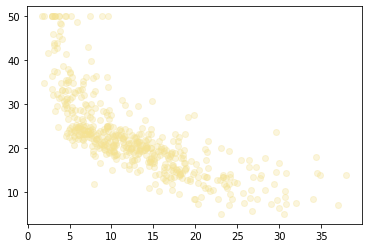

In [ ]:
plt.scatter(X, Y, color='#F4E29150')
plt.show()

We see that there is a certain correlation. Indeed when X (feature-K) decreases, Y (target) decreases too. But the relationship is not obvious nor strong enough to conclude that there is a linear relationship between our feature-K and the target.

As you can see I have chosen a transparent yellow `#F4E29150` as color. The percentage of opacity is determined by the last 2 numbers. Here we are at 50% opacity. I did not make this choice randomly. In fact by choosing a transparent color, we can identify where the data is piled up.

Indeed when an area is composed of several points, they become more and more opaque. This makes it easy to spot where the data are most present and conversely, to spot where the most disparate data are. This would not be possible if the opacity was 100%.

**In addition to the X and Y axis, color is a second parameter to play with to improve your analysis.**

Let’s continue our analysis using basic Data Science algorithms. This will allow us to go deeper into our results.

## **Few Data Science algorithms to start with**

### **Linear regression**

In the previous section we concluded that there is a correlation between our feature-K data and the target. But we doubted whether this relationship is linear.

**The linear relationship is the first hypothesis to check. Indeed, it is both the simplest to establish, but also the one that allows us to solve the problem most easily.**

We are going to use the `LinearRegression` algorithm of Scikit-learn library. This algorithm allows us to draw a line that minimizes the distance between it and each of the points.

If each point on our graph is positioned on the plotted line, the relationship between X and Y is linear.

In [ ]:
from sklearn.linear_model import LinearRegression

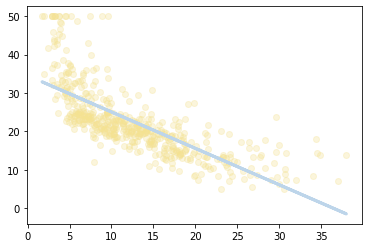

In [ ]:
regressor = LinearRegression()
regressor.fit(X, Y)
plt.scatter(X, Y, color='#F4E29150')
plt.plot(X, regressor.predict(X), color='#BDD5EA', linewidth=3)
plt.show()

Here we can clearly see that very few points are positioned on the line. We could have been flexible if most of the points were on the line and only a few were away from it. But here, it is the opposite. Most of the points do not belong to the drawn line.

**The relationship between our feature-K and the target is therefore not linear.**

Now we have two options to predict our target:

*   Apply a transformation to our feature-K to create a linear relationship between X and Y
*   Use other algorithms from the scikit-learn library

Let’s to follow the second one ! 🔥

### **Support Vector Machine**

We will start with a Support Vector Machine (SVM) algorithm. To make it simple, this algorithm does the same as the LinearRegression, but for non-linear relationships.

Here, instead of having a line, we will have a curve.

**The SVM will draw a curve (in fact a set of points) that minimizes the distance between this curve and the other points.**

If each point of our graph is positioned on the drawn curve, Y can be predicted thanks to the SVM.

Several types of SVM exist, in our case we will use the SVR (Epsilon-Support Vector Regression) algorithm.

I want to keep this article as practical as possible so I won’t go into the details of the algorithm. Nevertheless, if you want to know more about it, feel free to go on the [SVM Wikipedia page](https://en.wikipedia.org/wiki/Support-vector_machine) or directly on [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

In [ ]:
from sklearn.svm import SVR

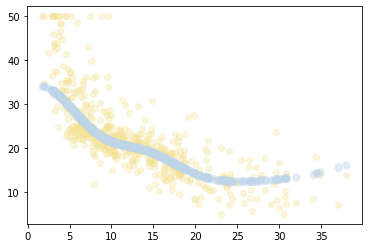

In [ ]:
regressor = SVR()
regressor.fit(X, Y)
plt.scatter(X, Y, color='#F4E29150')
plt.scatter(X, regressor.predict(X), color='#BDD5EA50', linewidth=3)
plt.show()

The curve fits our data much better than the linear regression line!

Indeed, we can see that our points seem to pass right in the middle of our data set (bottom left).

We are on the right path !

**Let’s see if we can do better with another algorithm : Random Forest.**

### **Random Forest**

One of the most common algorithms you will encounter.

**Several technical words to remember will follow…**

Actually, Random Forest gathers in itself several algorithms. This is called Ensemble Learning.

**Ensemble Learning** is the fact of using several algorithms at the same time to obtain a better performance.

The Random Forest uses an ensemble of Decision Tree algorithms.

**A Decision Tree** is an algorithm that makes a prediction or classification. It creates a tree-like diagram that presents the possibilities according to the information we have.

In a Random Forest we will use several Decision Trees to optimize our results. For this we use the `RandomForestRegressor` algorithm of Scikit-learn.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

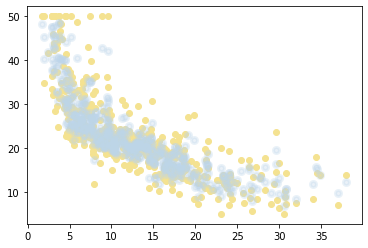

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X, Y)
plt.scatter(X, Y, color='#F4E291');
plt.scatter(X, regressor.predict(X), color='#BDD5EA50', linewidth=3)
plt.show()

The result is perfect ! The points created by the Random Forest are very well adapted to our problem.

This is the end of your first Machine Learning project !

**You’ve seen the fundamental techniques of data analysis and used the basic Machine Learning algorithms thanks to Scikit-learn.**

What’s next for you ?

Here are the concepts and practices you need to study:
*   Feature Engineering, it’s [the fundamental difference between the Machine Learning and the Deep Learning](https://www.inside-machinelearning.com/en/feature-engineering-what-deep-learning-has-to-offer-to-ml/) we explain it in [this article](https://www.inside-machinelearning.com/en/feature-engineering-what-deep-learning-has-to-offer-to-ml/)
*   Fine Tuning, changing the parameters of your algorithms to find the optimal solution
*   Countering overfitting, we talk about it [here !](https://www.inside-machinelearning.com/en/5-mistakes-machine-learning/)

You can also go deeper into **Data Analysis** which is a whole field of Data Science. With it you will be able to better understand our basic data.